<a href="https://colab.research.google.com/github/MuhammadHelmyOmar/Hadith/blob/main/bow_featuring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next

- Preprocessing
  - ~Removing punctuations, stop words, and diacritics~
- Visualize
  - box blots for Hadiths lengths
  - cosine similarity between words using embeddings
  - clustering using embeddings (increase word size)
- ~Increase Dataset size~


# Loading Data

In [171]:
import pandas as pd

In [172]:
data_url = 'https://raw.githubusercontent.com/KamelGaanoun/MHDetection/main/Corpus/trainFinal.csv'

data = pd.read_csv(data_url, index_col='Unnamed: 0')
print("CSV file loaded successfully!")
# Display the first few rows of the DataFrame
data.head()

CSV file loaded successfully!


,Matan,Degree
19036,لقد رأيتني وأنا ثلث الإسلام،‏.‏,0
17209,هريرة، أن أعرابيا، أتى النبي صلى الله عليه وس...,0
11245,عائشة، قالت كنت أفتل قلائد هدى رسول الله صلى ...,0
2827,قال النبي صلى الله عليه وسلم ‏ ‏ إني فرطكم على...,0
23616,عن النبي صلى الله عليه وسلم قال أقيموا الركوع ...,0


In [173]:
print(len(data))
print(data['Degree'].value_counts())

21248
Degree
0    19286
1     1962
Name: count, dtype: int64


In [174]:
# Filter data for each degree
data_degree_0 = data[data['Degree'] == 0]
data_degree_1 = data[data['Degree'] == 1]

# Sample 200 rows from each degree (if available)
# Use .sample(n, random_state) for reproducible sampling
sampled_degree_0 = data_degree_0.sample(n=min(1962, len(data_degree_0)), random_state=42)
sampled_degree_1 = data_degree_1.sample(n=min(1962, len(data_degree_1)), random_state=42)

# Concatenate the sampled dataframes
sampled_data = pd.concat([sampled_degree_0, sampled_degree_1])

# Display the value counts to verify the sampling
print("Value counts of the sampled data:")
display(sampled_data['Degree'].value_counts())

# Display the head of the sampled data
print("\nSampled data head:")
display(sampled_data.head())

Value counts of the sampled data:


,count
Degree,
0,1962
1,1962



Sampled data head:


,Matan,Degree
13645,أنها استعارت من أسماء قلادة فهلكت فأرسل النبي ...,0
16561,يقول كان رسول الله صلى الله عليه وسلم يأتي قبا...,0
13787,هريرة، أن رسول الله صلى الله عليه وسلم قال قلب...,0
4475,أبيه، أن النبي صلى الله عليه وسلم قال لا تزال ...,0
16463,القاسم صلى الله عليه وسلم تسموا باسمي ولا تكنو...,0


In [175]:
labels = sampled_data['Degree'].values
labels.shape

(3924,)

# Preprocessing

In [176]:
import re
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
arabic_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
def remove_diacritics(text):
  # remove diacritics
  text = text.replace(u"\u064B", "")  # fatHatayn
  text = text.replace(u"\u064C", "")  # Dammatayn
  text = text.replace(u"\u064D", "")  # kasratayn
  text = text.replace(u"\u064E", "")  # fatHa
  text = text.replace(u"\u064F", "")  # Damma
  text = text.replace(u"\u0650", "")  # kasra
  text = text.replace(u"\u0651", "")  # shaddah
  text = text.replace(u"\u0652", "")  # sukuun
  text = text.replace(u"\u0670", "`")  # dagger 'alif
  return text

In [178]:
sampled_data['Matan'] = sampled_data['Matan'].apply(lambda hadith: remove_diacritics(hadith))

In [179]:
sampled_data['text_length'] = sampled_data['Matan'].str.len()
sampled_data['stopwords_count'] = sampled_data['Matan'].apply(lambda hadith: len([word for word in hadith.split() if word in arabic_stopwords]))
sampled_data = sampled_data.sort_values(by='text_length',ascending=[0])
sampled_data.head()

,Matan,Degree,text_length,stopwords_count
1427,لما أسري بي إلى السماء رأيت فيها أعاجيب من ع...,1,29527,1629
4106,أن جبريل عليه السلام أتى النبي صلى الله عليه...,1,9507,440
3738,زيارة إبليس اللعين للنبي صلى الله عليه وسلم...,1,9363,474
10718,أنس بن مالك رضي الله عنه قال: ((جاء جبريل إ...,1,8711,438
22047,((روي عن النبي صلى الله عليه وآله وسلم أنه ق...,1,7504,471


In [204]:
# Create a CountVectorizer Object
vectorizer = CountVectorizer(stop_words=list(arabic_stopwords), min_df=0.003, max_df=0.3)

# Fit and transform the corpus
bow = vectorizer.fit_transform(sampled_data['Matan'])

# Print the length of the generated vocabulary
print("Vocabulary Size:", len(vectorizer.get_feature_names_out()))

# Print the Bag-of-Words matrix
print("BoW Representation:")
print(bow.toarray())
print(bow.shape)

Vocabulary Size: 960
BoW Representation:
[[2 3 0 ... 3 0 0]
 [1 0 1 ... 5 0 1]
 [1 4 0 ... 9 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(3924, 960)


# Exploratory Text Analysis

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

## Top N words

In [ ]:
# Get feature names (words)
words = vectorizer.get_feature_names_out()

# Sum up the occurrences of each word across all documents
counts = bow.sum(axis=0).A1

# Create a dictionary of word counts
word_counts = dict(zip(words, counts))

# Sort the dictionary by frequency in descending order
word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

In [223]:
# Get the list of top N words from the previous analysis
top_n = 20
print(f"Top {top_n} most frequent words:")
top_words = list(word_counts.keys())[:top_n]

# Filter data by degree
data_degree_0 = sampled_data[sampled_data['Degree'] == 0]['Matan']
data_degree_1 = sampled_data[sampled_data['Degree'] == 1]['Matan']

# Create CountVectorizer objects for each degree, using the vocabulary of the top words
vectorizer_degree_0 = CountVectorizer(vocabulary=top_words)
vectorizer_degree_1 = CountVectorizer(vocabulary=top_words)

# Transform the data for each degree
bow_degree_0 = vectorizer_degree_0.fit_transform(data_degree_0)
bow_degree_1 = vectorizer_degree_1.fit_transform(data_degree_1)

# Sum the occurrences of each top word in each degree
word_counts_degree_0 = bow_degree_0.sum(axis=0).A1
word_counts_degree_1 = bow_degree_1.sum(axis=0).A1

# Create dictionaries of word counts for each degree
word_counts_0_dict = dict(zip(top_words, word_counts_degree_0))
word_counts_1_dict = dict(zip(top_words, word_counts_degree_1))

# Create a DataFrame to compare the counts
comparison_df = pd.DataFrame({
    'Degree_0_Count': word_counts_0_dict,
    'Degree_1_Count': word_counts_1_dict
})

# Calculate the total count for each word across both degrees
comparison_df['Total Count'] = comparison_df['Degree_0_Count'] + comparison_df['Degree_1_Count']

# Display the comparison table, sorted by total count
display(comparison_df.sort_values(by='Total Count', ascending=False))

Top 20 most frequent words:


,Degree_0_Count,Degree_1_Count,Total Count
فقال,991,596,1587
النبي,933,288,1221
بن,562,213,775
يوم,166,362,528
الجنة,87,337,424
يقول,273,119,392
أبي,239,126,365
الناس,181,178,359
محمد,79,256,335
ابن,246,72,318


## Comparing lengths

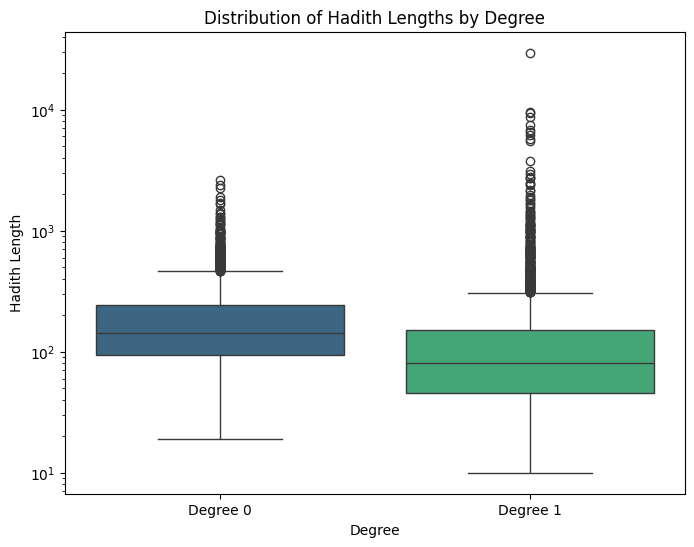

In [218]:
# Create box plots for Hadith lengths by degree
plt.figure(figsize=(8, 6))
sns.boxplot(x='Degree', y='text_length', data=sampled_data, hue='Degree', palette='viridis', legend=False)
plt.title('Distribution of Hadith Lengths by Degree')
plt.xlabel('Degree')
plt.ylabel('Hadith Length')
plt.xticks([0, 1], ['Degree 0', 'Degree 1'])
plt.yscale('log') # Scaled the y-axis logarithmically
plt.show()

In [219]:
# Calculate percentiles for text length by degree
percentiles = sampled_data.groupby('Degree')['text_length'].quantile([0.25, 0.5, 0.75])

print("Percentiles of Hadith Length by Degree:")
display(percentiles)

Percentiles of Hadith Length by Degree:


Degree      
0       0.25     94.00
        0.50    144.00
        0.75    241.75
1       0.25     46.00
        0.50     80.00
        0.75    151.00
Name: text_length, dtype: float64

In [220]:
# Calculate IQR for each degree
Q1 = sampled_data.groupby('Degree')['text_length'].quantile(0.25)
Q3 = sampled_data.groupby('Degree')['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
upper_bound = Q3 + 1.5 * IQR

print("\nUpper bounds for outliers:")
display(upper_bound)

# Identify outliers for each degree
outliers_degree_0 = sampled_data[(sampled_data['Degree'] == 0) &
                                (sampled_data['text_length'] > upper_bound[0])]

outliers_degree_1 = sampled_data[(sampled_data['Degree'] == 1) &
                                (sampled_data['text_length'] > upper_bound[1])]


# Print the number of outliers
print(f"Number of outliers for Degree 0 above upper bound: {len(outliers_degree_0)}")
print(f"Number of outliers for Degree 1 above upper bound: {len(outliers_degree_1)}")


Upper bounds for outliers:


,text_length
Degree,
0,463.375
1,308.500


Number of outliers for Degree 0 above upper bound: 146
Number of outliers for Degree 1 above upper bound: 227


# Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(bow, labels, test_size=0.2,random_state=109)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3139, 24735), (785, 24735), (3139,), (785,))

# Modeling

In [15]:
from sklearn.svm import SVC, LinearSVC

In [16]:
clf = LinearSVC(random_state=109)
clf.fit(X_train, y_train)

LinearSVC(random_state=109)

# Evaluation

In [17]:
from sklearn import metrics

In [18]:
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.9184713375796179
Precision: 0.9119170984455959
Recall: 0.9214659685863874
F1 Score: 0.9166666666666666


In [19]:
coefficients = list(clf.coef_[0])
words = list(vectorizer.get_feature_names_out())
maximas = {}
minimas = {}

for i in range(100):
  max_value = max(coefficients)
  min_value = min(coefficients)

  mx = coefficients.index(max_value)
  maximas[words[mx]] = max_value
  coefficients.pop(mx)
  words.pop(mx)

  mn = coefficients.index(min_value)
  minimas[words[mn]] = min_value
  coefficients.pop(mn)

In [20]:
minimas.keys()

dict_keys(['وسلم', 'أنزل', 'يححدوني', 'الإسلام', 'أسقطتهن', 'عرست', 'المزفت', 'يتختم', 'كمهدي', 'أحدث', 'بهاتف', 'بمال', 'يقف', 'متي', 'سياحين', 'فصفقت', 'والأجداد', 'قارئ', 'فحينما', 'ملعون', 'صائما', 'يدمنها', 'الدرك', 'التقوى', 'نهانا', 'يقص', 'تطلبه', 'وارتعد', 'سواكه', 'الحبشة', 'بماء', 'سعير', 'جاد', 'يرحمه', 'خليلاه', 'العلانية', 'الخلق', 'بالبالغ', 'السعيفات', 'زملوني', 'عمرك', 'النبوة', 'أقرئ', 'أرقم', 'أمنهم', 'اعتراك', 'مرية', 'ونوم', 'ونور', 'المسلمون', 'الأعصم', 'جمة', 'أنكره', 'الجاري', 'يفطروا', 'خدامها', 'ربنا', 'ويمر', 'أليس', 'الفرحين', 'مركبا', 'وإياهم', 'جذام', 'بمرأة', 'تهلل', 'سالمها', 'صغيرا', 'كرمز', 'شراج', 'إنس', 'وأمسك', 'للغيبة', 'عملتموها', 'يبرئني', 'باتخاذ', 'السرة', 'وفاجرهم', 'فخروا', 'ملوكا', 'الناظرين', 'بنعمتك', 'ماأعطى', 'الزلازل', 'قرآنه', 'وفضلهم', 'حجرتها', 'بوضع', 'السابقين', 'يطيل', 'سهما', 'يؤنسك', 'مسندا', 'معنا', 'عقيرته', 'ركبة', 'مصبح', 'الخميصة', 'خاصم', 'فتوضئوا'])

In [21]:
maximas.keys()

dict_keys(['وآله', 'رضي', 'على', 'عوانة', 'المرآة', 'البقل', 'المقاصيص', 'النضير', 'معاشي', 'الإنابة', 'يفرطون', 'داركم', 'صلاح', 'فقوم', 'الخضرة', 'عهدي', 'ترفعني', 'الحليم', 'الطرفاوات', 'يرعني', 'لأريك', 'العارفين', 'جبة', 'يعاب', 'أهله', 'نظرة', 'الأعجل', 'بالنشأة', 'أذلة', 'بالكنى', 'النعل', 'والسفر', 'شواهق', 'الهنية', 'نيرانهم', 'جانبك', 'أمتك', 'أتاه', 'بأذربيجان', 'فصل', 'اسكن', 'ألا', 'الأبيض', 'حزينا', 'الأوسط', 'الكافرون', 'حاضر', 'رافقتم', 'المطرقة', 'ويصلون', 'العقد', 'الشقاوة', 'أشك', 'أرأيتم', 'وأعرف', 'المكتوب', 'منشورة', 'لتجلس', 'الأمهات', 'يسمعون', 'عقولهم', 'الفرج', 'تحب', 'رافعين', 'يأوي', 'كالصياصي', 'اليبة', 'أطعمت', 'لقاءه', 'هباء', 'مجالسهم', 'ثابت', 'معادك', 'فلينم', 'أوتر', 'خندقين', 'يبتغي', 'نصرته', 'طيبت', 'موعدي', 'ليرينا', 'الجمان', 'والجبروت', 'سمعن', 'يلامون', 'هاربا', 'الجوف', 'مسرجا', 'ليله', 'جزائر', 'يناد', 'البول', 'شمت', 'جنبه', 'للصوت', 'البياض', 'فأيما', 'جلوسا', 'لحومهم', 'وتلألؤ'])

In [22]:
maximas

{'وآله': np.float64(1.1938665146584901),
 'رضي': np.float64(1.076263544614624),
 'على': np.float64(0.8173294475089198),
 'عوانة': np.float64(0.6582956987434359),
 'المرآة': np.float64(0.5665875677649457),
 'البقل': np.float64(0.5412931327317855),
 'المقاصيص': np.float64(0.5408461741016375),
 'النضير': np.float64(0.5338317141162892),
 'معاشي': np.float64(0.5337893554894109),
 'الإنابة': np.float64(0.5196780825171816),
 'يفرطون': np.float64(0.5149171357977912),
 'داركم': np.float64(0.5133852227732597),
 'صلاح': np.float64(0.5133852227732597),
 'فقوم': np.float64(0.5042846753975344),
 'الخضرة': np.float64(0.48807682416715625),
 'عهدي': np.float64(0.48807682416715625),
 'ترفعني': np.float64(0.47668386875354496),
 'الحليم': np.float64(0.47632108967055725),
 'الطرفاوات': np.float64(0.4736254887323945),
 'يرعني': np.float64(0.4729891167082618),
 'لأريك': np.float64(0.468277979654935),
 'العارفين': np.float64(0.45023454350179387),
 'جبة': np.float64(0.44791806712238835),
 'يعاب': np.float64(0.

# Gemi